<span style="color:#9bb1d4;font-size:30px;font-weight:900"> Repetisjon - Pandas og Matplotlib 🐼 </span>  

### I denne økta skal vi repetere:
- Hvordan lage og endre en **DataFrame**
- Bruke `.loc` for å hente og endre data
- Lage nye kolonner
- Bruke løkker og betingelser (`if`)
- Lage enkle grafer med **Matplotlib**

Til slutt skal vi kombinere alt for å lage en liten analyse og visualisering!


## **Eksempel: Importere Pandas og laste inn en CSV-fil**
Det gjør vi ved å skrive følgende:

```python
        # Laste inn en CSV-fil som et DataFrame
        data = pd.read_csv('data/eksempel_data.csv')

        # Vise de første radene i DataFrame
        data.head()
```

MEN! Her er det viktig å huske på at *'data/eksempel_data.csv'* må være *banenavn* til filen du ønsker å lese. Den er altså unik for din PC/MAC.

**OBS!** En del Windows brukere må skrive en `r` (som står for *read*) foran `'data/eksempel_data.csv'`, altså slik `data = pd.read_csv(r'data/eksempel_data.csv')`, så prøv det om du får feilmelding.

In [98]:
# Laste inn en CSV-fil som et DataFrame
data = pd.read_csv(r'/Users/maaas6121/Library/CloudStorage/OneDrive-UiTOffice365/Skrivebord/Bachelor_Emner/BED-1304/H25_NyttKurs/data/schooling-gdp.csv')

### OBS: FÅR DU FEILMEDLING OVER, SJEKK AT FILBANEN ER RIKTIG TIL DIN MAC/PC!!! ###

# Vise de første radene i DataFrame
data.head()

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.680,11.65,4886000
1,Kuwait,KWT,67029.523,6.39,2992000
2,Luxembourg,LUX,57882.809,11.33,508000
3,Switzerland,CHE,55688.020,12.92,7809000
4,United States,USA,49500.629,13.24,309011008


In [100]:
data

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.68000,11.65,4886000
1,Kuwait,KWT,67029.52300,6.39,2992000
2,Luxembourg,LUX,57882.80900,11.33,508000
3,Switzerland,CHE,55688.02000,12.92,7809000
4,United States,USA,49500.62900,13.24,309011008
...,...,...,...,...,...
101,Malawi,MWI,972.04572,5.01,14540000
102,Mozambique,MOZ,969.23077,2.03,23532000
103,Niger,NER,845.86932,1.95,16464000
104,Liberia,LBR,786.67023,4.35,3891000


Vi ser at vi har fire variabler: `Land`, `Landkode`, `BNP_per_capita` (BNP per innbygger), `Utdanning` og `Befolkning`. BNP er "brutto nasjonalprodukt" som måler hvor mye som produseres i et land i løpet av et år. `BNP_per_capita` viser altså hvor mye hver person i landet produserer hvert år i gjennomsnitt.  

Import av data til `pandas` gjøres enkelt med funksjonen `read_csv`. Dersom du har lastet ned siste versjon av notebooks, ligger den en fil i mappen "data" som heter schooling-gdp.csv. (kilde: [Our World In Data](https://ourworldindata.org/grapher/correlation-between-mean-years-of-schooling-and-gdp-per-capita)). Denne filen inneholder data om BNP (bruttonasjonalprodukt) og utdanningsnivå for ulike land i 2010.

## **Operasjoner på dataframe's**
Vi antar at vi har kalt *dataframen* (norsk: *dataramme*) for ```data``` (som over). 

Her er en liste av operasjoner vi kan gjøre for å inspisere, endre og bli kjent med data'en vår ved hjelp av Pandas. Denne kan være et fint oppslagsverk for hva dere kan trenge om Pandas. Dokumentasjon om dette finnes også [her](https://pandas.pydata.org/docs/) og over "hele" Google!

| **Operasjon**                          | **Formål**                                                     | **Syntaks i Python**                                |
|----------------------------------------|----------------------------------------------------------------|-----------------------------------------------------|
| Vise kolonneoverskriftene              | Viser navnene på kolonnene i DataFrame                         | `data.columns`                                      |
| Velge en spesifikk kolonne             | Hente data fra en spesifikk kolonne                            | `data['kolonnenavn']`                               |
| Filtrere rader basert på betingelse    | Filtrere data der en betingelse er oppfylt                     | `data[data['Utdanning'] > 10]`                      |
| Sjekke manglende verdier               | Sjekker om det finnes manglende verdier i datasetet            | `data.isnull().sum()`                               |
| Fylle manglende verdier                | Fyller inn manglende verdier med en gitt verdi                 | `data.fillna(0, inplace=True)`                      |
| Beskrivelse av numeriske verdier       | Gir en statistisk oversikt over numeriske kolonner             | `data.describe()`                                   |
| Sortere data (stigende)                | Sorterer data etter en kolonne i stigende rekkefølge           | `data.sort_values('kolonnenavn', ascending=True)`   |
| Se datatyper                           | Viser datatypene til hver kolonne                              | `data.dtypes`                                       |
| Konvertere datatype                    | Endrer datatype for en spesifikk kolonne                       | `data['kolonne'] = data['kolonne'].astype(float)`   |
| Lese fra Excel-fil (xlsx)              | Leser data fra en Excel-fil (xlsx)                             | `data = pd.read_excel('filnavn.xlsx')`              |
| Lese fra Excel-fil (csv)               | Leser data fra en Excel-fil (csv)                              | `data = pd.read_csv('filnavn.csv')`                 |
| Ny kolonne med beregninger             | Oppretter en ny kolonne som er et resultat av beregninger      | `data['new_column'] = data['kolonne1'] / data['kolonne2']` |
| Finne duplikater                       | Sjekker om det finnes dupliserte rader                         | `data.duplicated()`                                 |
| Fjerne duplikater                      | Fjerner dupliserte rader                                       | `data.drop_duplicates(inplace=True)`                |
| Histogram                              | Lager et histogram for en spesifikk kolonne                    | `data['kolonnenavn'].plot(kind='hist')`             |
| Konvertere til datetime                | Konverterer en kolonne til datetime-objekter                   | `data['dato'] = pd.to_datetime(data['dato'])`       |
| Informasjon av datarammen              | Oppsummere hva datarammen er og består av                      | `data.info()`                                       |
| Velger rader med **loc**               | Velge rader basert på etiketter (navn)                         | `data.loc[2, 'Navn']`                               |
| Velger rader med **iloc**              | Velge rader basert på indeksnummer                             | `data.iloc[2, 1]`                                    |
| "Merge" to DataFrames                  | Kombinere to DataFrames basert på en felles kolonne            | `df3 = df1.merge(df2, on='ID', how='inner')`        |
| Oppsummerende statistikker             | Gir spesifikke beregninger som gj.snitt, median, maks, osv.    | `data['kolonne'].mean()` eller `data['kolonne'].median()`  |




... og det er mange, mange fler. Det vil dere få testa dere på gjennom oppgavene. Kommer du over et problem du ikke har sett før, prøv å google det. 

Lurer du på noe, så har noen lurt på det samme før deg :-)

## Eksempelbruk av operasjoner på dataframe's
Siden vi allerede har kjørt kodeblokken over, har vi variabelen ```data```, som inneholder dataframe'n med data fra 'schooling-gdp.csv'-filen vår.

# Oppgave til senere
Gå igjennom lista over, og "lek" dere med dataframen om utdanning/BNP.

Vi ser at vi har fem variabler i datasettet:

- **Land** – navnet på landet  
- **Landkode** – forkortet landkode (f.eks. NOR, SWE, DEU)  
- **BNP_per_capita** – BNP per innbygger (målt i USD, 2010)  
- **Utdanning** – gjennomsnittlig antall år utdanning i landet  
- **Befolkning** – antall innbyggere  

**BNP (Bruttonasjonalprodukt)** måler hvor mye som produseres i et land i løpet av et år.  
`BNP_per_capita` viser hvor mye hver person i landet produserer i gjennomsnitt.

### 🔹 Grunnleggende utforskning av datasett

1. **Vis kolonnenavnene** i datasettet.  
   ```python
   data.columns

2. Se på de første radene for å få oversikt over dataene.

3. Sjekk datatyper for hver kolonne.

4. Vis informasjon om datasettet (antall rader, kolonner og manglende verdier).

5. Sjekk om det finnes manglende verdier, og se hvilke kolonner de finnes i.

6. Fyll inn manglende verdier i Utdanning-kolonnen med gjennomsnittlig verdi.

7. Sorter dataene etter BNP per innbygger (stigende).

8. Beregn gjennomsnittlig utdanning for alle land.

9. Finn landet med høyest BNP per innbygger.

10. Filtrer ut alle land der utdanning > 10 år.

In [81]:
# Din kode her...


_____

## **Matplotlib**

Det er fint å kunne lage funksjoner i Python, men det er enda bedre å *se* dem. Vi skal nå se på hvordan vi kan tegne resultatet av funksjoner i et diagram ved hjelp av pakken `matplotlib`. 

Ofte ønsker vil å bruke matplotlib til å vise oss sammenhenger i data vi har hentet inn. Når vi importerer data til Python bruker vi vanligvis pakken `pandas`. Vi har allerede diskutert hvordan vi kan arbeide med data i `pandas`, så foreløpig skal vi ikke gjøre noe mer enn å importere og bruke dataene i `matplotlib`. 

Vi starter derfor med å *importere* `matplotlib`, `numpy` og `pandas`:

#### Eksempel 1:

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Plotte tall

Vi starter med å plotte følgende tre kooridnater: (4,8), (7,2) og (2,6). For å gjøre det lager vi én variabel med x-koordinatene, og én med y-koordiantene. Funksjonen `plot`lager en figur med linjer mellom hvert av punktene:

#### Eksempel 2:

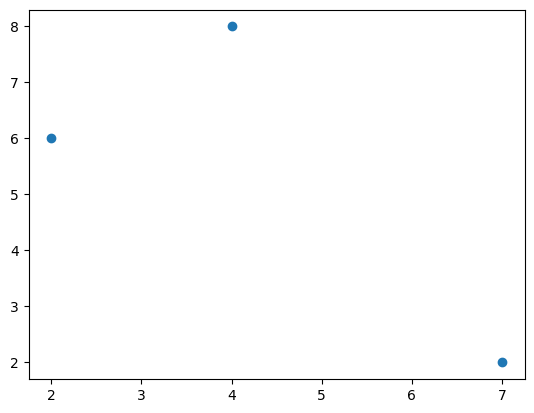

In [18]:
x = [4, 7, 2] # x koordinatene
y = [8, 2, 6] # y koordinatene

plt.scatter(x,y) # gir punktene
plt.show()       # viser figuren

Vi kan legge til punktene, så vi ser dem tydligere, med funksjonen `scatter`:

#### Eksempel 3:

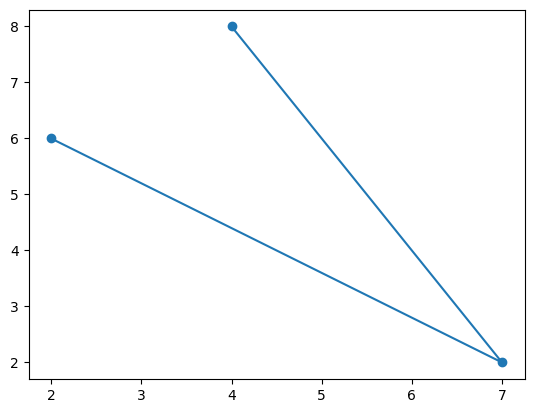

In [19]:
plt.plot(x,y)    # plt.plot - lager linjer
plt.scatter(x,y) # plt.scatter - lager punkter

plt.show()

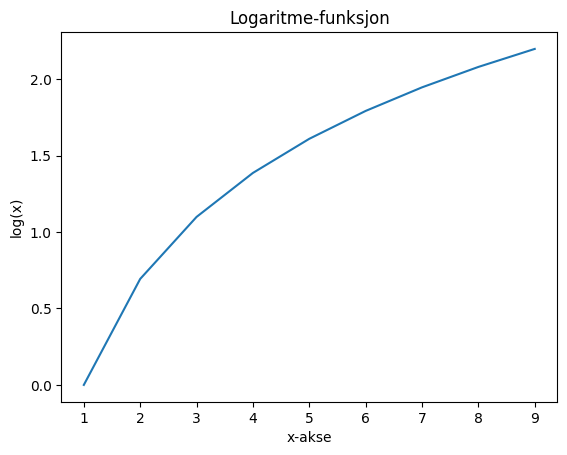

In [29]:
import numpy as np

# range gjør at vi slipper å skrive alle tallene i en liste
x = range(1,10)
#x = np.linspace(1, 10, 100)

y = np.log(x) # Logaritme-funksjon

plt.plot(x,y) # Plot    

plt.xlabel('x-akse')
plt.ylabel('log(x)')
plt.title("Logaritme-funksjon")
plt.show()    # Viser plottet

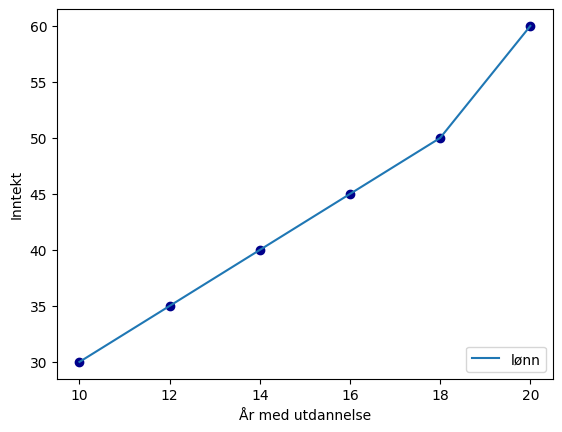

In [21]:
year_education = [10, 12, 14, 16, 18, 20]
income = [30, 35, 40, 45, 50, 60]

plt.scatter(year_education, income, color = 'darkblue')
plt.plot(year_education, income, label = 'lønn')

plt.xlabel("År med utdannelse")
plt.ylabel("Inntekt")

plt.legend(loc = 'lower right')

plt.show()

## Operasjoner man kan bruke i MatPlotLib

| **Operasjon**                          | **Formål**                                                     | **Syntaks i Python**                                           |
|----------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|
| Importere biblioteket                  | Gjør matplotlib tilgjengelig i koden                           | `import matplotlib.pyplot as plt`                              |
| Lage en enkel figur                    | Oppretter et nytt plott                                       | `plt.figure()`                                                 |
| Plot linje                             | Lager et linjediagram                                          | `plt.plot(x, y)`                                               |
| Plot punkter (scatter)                 | Lager et punktdiagram                                          | `plt.scatter(x, y)`                                            |
| Plot stolpediagram                     | Lager et stolpediagram                                         | `plt.bar(x, y)`                                                |
| Plot histogram                         | Viser fordeling av verdier                                    | `plt.hist(data, bins=10)`                                      |
| Legge til tittel                       | Legger til tittel på plottet                                   | `plt.title('Min figur')`                                       |
| Navn på x-akse                         | Setter navn på x-aksen                                         | `plt.xlabel('X-akse')`                                         |
| Navn på y-akse                         | Setter navn på y-aksen                                         | `plt.ylabel('Y-akse')`                                         |
| Legge til rutenett                     | Viser rutenettlinjer                                           | `plt.grid(True)`                                               |
| Endre figurstørrelse                   | Setter størrelse på figuren (bredde, høyde i tommer)           | `plt.figure(figsize=(8,5))`                                    |
| Endre farge                            | Setter farge på linje eller punkter                            | `plt.plot(x, y, color='red')` eller `plt.scatter(x, y, c='blue')` |
| Endre linjestil                        | Justerer hvordan linjen ser ut                                 | `plt.plot(x, y, linestyle='--')`                               |
| Endre markør                           | Endrer markørtype for punkter                                  | `plt.plot(x, y, marker='o')`                                   |
| Legge til tegnforklaring               | Viser hvilke linjer/punkter som hører til hvilke data          | `plt.legend(['Serie 1', 'Serie 2'])`                           |
| Lagre figur til fil                    | Lagrer plottet som bildefil                                   | `plt.savefig('figur.png')`                                     |
| Vise plottet                           | Viser plottet i notebook/vindu                                 | `plt.show()`                                                   |
| Endre aksegrenser                      | Setter manuelle grenser på x- og y-aksene                      | `plt.xlim(0, 100); plt.ylim(0, 50)`                            |
| Annotering / tekst i plottet           | Skriver tekst direkte i grafen                                 | `plt.text(x, y, 'Tekst her')`                                  |
| Horisontal / vertikal linje            | Tegner hjelpelinjer i plottet, for å markere ting              | `plt.axhline(y=0)` eller `plt.axvline(x=0)`                    |

## 💡 Eksempler på bruk

### Enkel linjeplot
```python
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.figure(figsize=(8,5))
plt.plot(x, y, color='green', marker='o', linestyle='--')
plt.title("Enkel linjegraf")
plt.xlabel("X-akse")
plt.ylabel("Y-akse")
plt.grid(True)
plt.show()

### Kommenter koden under, for å forklare linje for linje

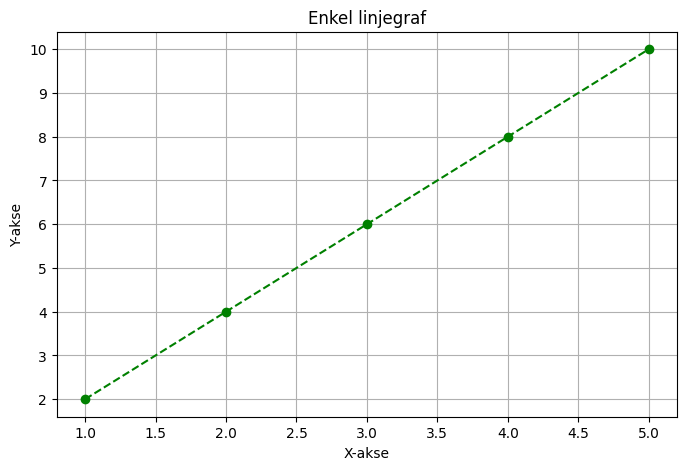

In [101]:
# Din kommentar her...
import matplotlib.pyplot as plt

# Din kommentar her...
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.figure(figsize=(8,5))
plt.plot(x, y, color='green', marker='o', linestyle='--')
plt.title("Enkel linjegraf")
plt.xlabel("X-akse")
plt.ylabel("Y-akse")
plt.grid(True)
plt.show()

___

# **Repetisjon - eksempeloppgaver**

# 🟦 Del 1 – Lage DataFrame fra scratch
Av og til jobber vi med mindre data, og vi kan lage egne DataFrames `df`. Det kan vi gjøre ved å f.eks. lage en dictionary `dict` først!

La oss se på et eksempel.

In [72]:
import pandas as pd

# Lager et lite datasett med værmålinger
data = {
    'Dag': ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag'],
    'Temperatur_C': [5, 8, 12, 10, 7],
    'Vind_m_s': [4.2, 3.8, 5.1, 2.5, 4.0]
}

df = pd.DataFrame(data)
print("Værdata:")
print(df)

Værdata:
       Dag  Temperatur_C  Vind_m_s
0   Mandag             5       4.2
1  Tirsdag             8       3.8
2   Onsdag            12       5.1
3  Torsdag            10       2.5
4   Fredag             7       4.0


# 🟨 Del 2 – Beregne ny kolonne
I meterologifaget, så finnes det konverteringer av **faktisk** temperatur, og om til **følt** temperatur. 

En forenkling av dette er:

$$\textbf{Følt temperatur} = \textbf{Faktisk termperatur i Celcius} - \left(\textbf{vind (m/s)} \cdot 0.7 \right)$$

La oss lage en kolonne, som har med dette.

In [73]:
# Lager en ny kolonne som viser 'Følt temperatur'
# En enkel modell: følt temperatur = temperatur - (vind * 0.7)
df['Følt_temp'] = df['Temperatur_C'] - (df['Vind_m_s'] * 0.7)

print("\nDataFrame med følt temperatur:")
print(df)


DataFrame med følt temperatur:
       Dag  Temperatur_C  Vind_m_s  Følt_temp
0   Mandag             5       4.2       2.06
1  Tirsdag             8       3.8       5.34
2   Onsdag            12       5.1       8.43
3  Torsdag            10       2.5       8.25
4   Fredag             7       4.0       4.20


# 🟧 Del 3 – Bruke df.loc

In [74]:
# Hente én verdi vha loc og indeks
print("Temperaturen på onsdag:", df.loc[2, 'Temperatur_C'], "grader")

Temperaturen på onsdag: 12 grader


In [75]:
# Hente én verdi vha navn i en kolonne, og hente verdi i en annen.
df.loc[df["Dag"] == "Onsdag", 'Temperatur_C']

2    12
Name: Temperatur_C, dtype: int64

In [76]:
# Filtrere rader
varme_dager = df.loc[df['Temperatur_C'] > 8, ['Dag', 'Temperatur_C']]
print("\nDager med temperatur over 8 grader:")
print(varme_dager)


Dager med temperatur over 8 grader:
       Dag  Temperatur_C
2   Onsdag            12
3  Torsdag            10


### 📘 Kort om `.loc`

- `df.loc[raden, kolonnen]` brukes til å hente eller endre verdier.
- Du kan også bruke det med en betingelse:
```python
df.loc[df['Temperatur_C'] > 8, ['Dag', 'Temperatur_C']]

# 🟪 Del 4 – Løkkeoppgave

### **🧠 Ekstra oppgave**
Kommenter koden i chunk'en under. Hva skjer her?

In [77]:
varme_dager_liste = []
temperatur = 7

for i in range(len(df)):
    if df.loc[i, 'Temperatur_C'] > temperatur:
        varme_dager_liste.append(df.loc[i, 'Dag'])

print(f'Dager med temperatur over {temperatur} grader: {varme_dager_liste}')

Dager med temperatur over 7 grader: ['Tirsdag', 'Onsdag', 'Torsdag']


_______

# **Oppgaver**

________

# 🧠 Oppgave 1

1. Legg til en kolonne kalt **"Værtype"**:
   - Hvis temperaturen er over 10°C → "Varm dag"
   - Ellers → "Kjølig dag"
   💡 Bruk `df.loc[i, 'Kolonne'] = verdi` inne i en løkke.  
2. Hvilken dag hadde høyest følt temperatur?
3. Lag en liste over dager der **vindstyrken var under 4 m/s**.

In [78]:
# Prøv selv før dere ser på løsningsforslag..:-)










# 🧠 Oppgave 1 – Løsningsforslag

In [79]:
# Oppgave 1.1
df['Værtype'] = ""

for i in range(len(df)):
    if df.loc[i, 'Temperatur_C'] > 10:
        df.loc[i, 'Værtype'] = "Varm dag"
    else:
        df.loc[i, 'Værtype'] = "Kjølig dag"

# Oppgave 1.2
# Høyest følt temperatur
varmest_dag = df.loc[df['Følt_temp'].idxmax(), 'Dag']

# Oppgave 1.3
# Vind under 4 m/s
rolige_dager = []
for i in range(len(df)):
    if df.loc[i, 'Vind_m_s'] < 4:
        rolige_dager.append(df.loc[i, 'Dag'])

print(df)
print("\nDagen med høyest følt temperatur:", varmest_dag)
print("Dager med vind under 4 m/s:", rolige_dager)

       Dag  Temperatur_C  Vind_m_s  Følt_temp     Værtype
0   Mandag             5       4.2       2.06  Kjølig dag
1  Tirsdag             8       3.8       5.34  Kjølig dag
2   Onsdag            12       5.1       8.43    Varm dag
3  Torsdag            10       2.5       8.25  Kjølig dag
4   Fredag             7       4.0       4.20  Kjølig dag

Dagen med høyest følt temperatur: Onsdag
Dager med vind under 4 m/s: ['Tirsdag', 'Torsdag']


# 🟦 Del 2 – Visualisering
Nå har vi sett på data om temperatur, vind og følt temperatur. La oss prøve å visualisere denne uka med data, på en fornuftig måte.

### 🧠 Liten "challenge"
Kommenter koden under, slik den blir selvforklarende.

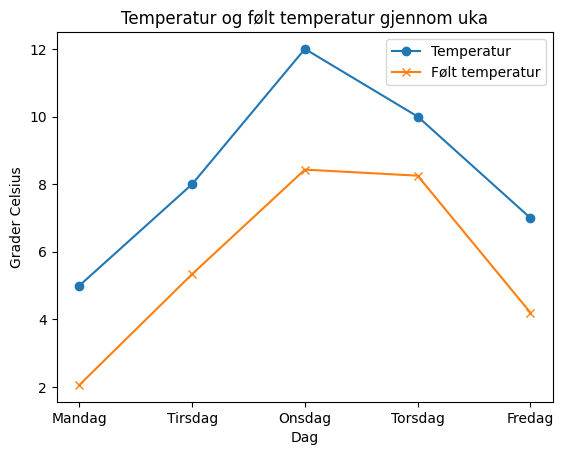

In [80]:
import matplotlib.pyplot as plt

plt.plot(df['Dag'], df['Temperatur_C'], marker='o', label='Temperatur')
plt.plot(df['Dag'], df['Følt_temp'], marker='x', label='Følt temperatur')
plt.title('Temperatur og følt temperatur gjennom uka')
plt.xlabel('Dag')
plt.ylabel('Grader Celsius')
plt.legend()
plt.show()

# **🧠🧠 Mer oppgaver**


## Oppgave 2 - Boligpriser
Kjør cellen under for å laste inn datasettet *Median_totalpris_boliger_Oslo.csv*.

1. Sjekk hvilke variabeltype de ulike kolonnene består av.
2. Finn generell info om `df`.
3. Lag et passende plott for å visualisere dette datasettet. Hva bør du tenke på?
    - Hvis oppgaven er vanskelig. Skriv en pseudokode.
    - Hvis du sliter, se på løsningsforslag og kommenter koden grundig.
4. Bruk `df.loc` til å hente utprisen for "Bydel Grünerløkka" i 2018.

In [102]:
import pandas as pd

# Leser inn en datafil rett fra GitHub repo til kurset
# Eller så kan du finne filen under "data" på nettsiden til kurset
url = "https://raw.githubusercontent.com/uit-bed-1304-h25/uit-bed-1304-h25.github.io/main/data/Median_totalpris_boliger_Oslo.csv"

# Leser filen
df = pd.read_csv(url)

print(df.head())

               Geografi     2018     2019     2020     2021     2022     2023
0      Bydel Gamle Oslo  3870000  4057000  4420000  4768000  5096000  5037000
1     Bydel Grünerløkka  3900000  4085000  4320000  4689000  5006000  5050000
2          Bydel Sagene  3983000  4154000  4303000  4825000  4950000  5176000
3  Bydel St. Hanshaugen  4666000  4691000  5087000  5565000  5813000  5750000
4         Bydel Frogner  5450000  5802000  6123000  6500000  6750000  6682000


## Oppgave 3 - Lønn i ulike yrkesgrupper
Dere skal se på det fiktive datasettet under, som omhandler tre yrkesgrupper, deres lønninger, sivilstand og lignende.

Dere skal følgende.
1. Finn ut hvilke variabeltype kolonnen har. Gir disse mening, eller må dere endre på noe?
2. Lag to nye kolonner, *Månedslønn* og *Dagslønn*. Anta at lønn gjelder hele året, og fordeles jevnt over 365 dager.
3. Lag et plott som tar for seg lønningene per yrkesgruppe.
    - Hvis oppgaven er vanskelig, skriv en pseudokode på penn og papir først.
    - Hvis dere vil, se på LF og prøv å kommenter koden grundig. 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Lager et fiktivt datasett
# ================================

# Setter random seed for reproduserbarhet
np.random.seed(42)

data = {
    "Alder": np.random.randint(22, 50, 20),
    "Nasjonalitet": np.random.choice(["Norge", "Tyskland", "Italia", "Albania", "Sverige"], 20),
    "Yrke": np.random.choice(["Ingeniør", "Økonom", "Lege"], 20),
    # Lønn som streng, f.eks. "820000" eller "950000"
    "Lønn": [str(np.random.randint(600000, 950000)) for _ in range(20)],
    "Sivilstand": np.random.choice(["Gift", "Ugift"], 20),
    "Bolig": np.random.choice(["Leilighet", "Rekkehus", "Enebolig"], 20)
}

df = pd.DataFrame(data)

print("=== Fiktivt datasett ===")
df.head()

=== Fiktivt datasett ===


,Alder,Nasjonalitet,Yrke,Lønn,Sivilstand,Bolig
0,28,Tyskland,Ingeniør,879303,Ugift,Leilighet
1,41,Albania,Lege,706530,Gift,Leilighet
2,36,Tyskland,Ingeniør,680077,Ugift,Leilighet
3,32,Albania,Lege,898064,Ugift,Enebolig
4,29,Sverige,Lege,800551,Gift,Leilighet


___

# Løsningsforslag (oppgave 2 og 3)

## Oppgave 2 LF

In [103]:
url = "https://raw.githubusercontent.com/uit-bed-1304-h25/uit-bed-1304-h25.github.io/main/data/Median_totalpris_boliger_Oslo.csv"

# Leser filen
df = pd.read_csv(url)

In [104]:
# Oppgave 2.1
print("Datatyper:\n", df.dtypes)

Datatyper:
 Geografi    object
2018         int64
2019         int64
2020         int64
2021         int64
2022         int64
2023         int64
dtype: object


In [105]:
# Oppgave 2.2

print("\nInfo om datasettet:")
df.info()


Info om datasettet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Geografi  16 non-null     object
 1   2018      16 non-null     int64 
 2   2019      16 non-null     int64 
 3   2020      16 non-null     int64 
 4   2021      16 non-null     int64 
 5   2022      16 non-null     int64 
 6   2023      16 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.0+ KB


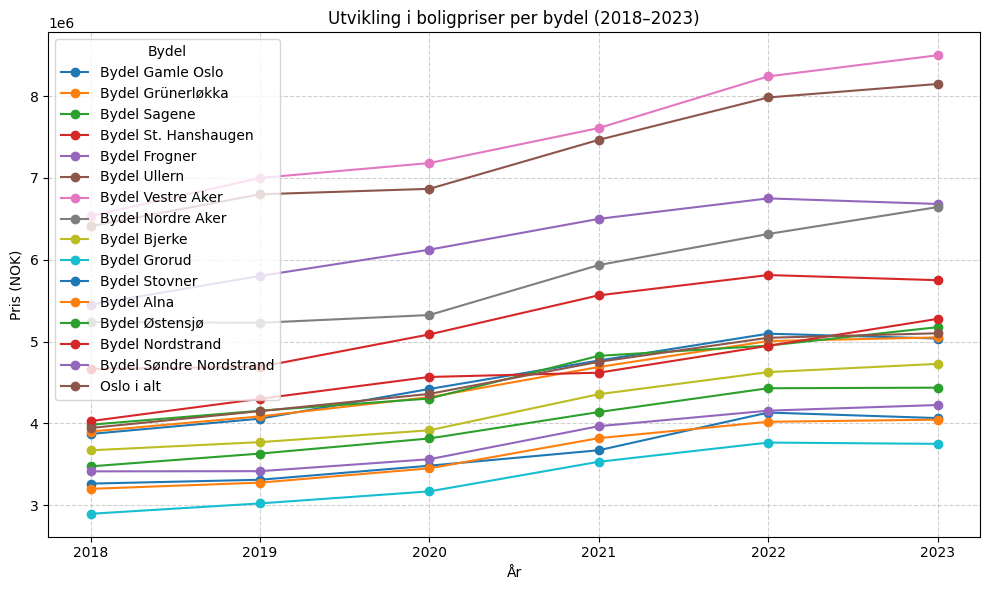

In [106]:
# Oppgave 2.3
# Tips: Her er verdiene boligpriser over tid -> linjediagram per bydel er mest passende

# Først setter vi "Geografi" som indeks slik at årene kan være kolonner
df_plot = df.set_index("Geografi").T  # Transponer for å få år som x-akse
plt.figure(figsize=(10,6)) # Lager et plott

# Plot alle bydeler
for col in df_plot.columns:
    plt.plot(df_plot.index, df_plot[col], marker="o", label=col)

plt.title("Utvikling i boligpriser per bydel (2018–2023)")
plt.xlabel("År")
plt.ylabel("Pris (NOK)")
plt.legend(title="Bydel")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [107]:
# Oppgave 2.4

# Henter du median pris på Grünerløkka i 2018.
Grunerlokka = df.loc[df["Geografi"] == "Bydel Grünerløkka", "2018"]
print("Median boligpris i Grünerløkka i 2018:", Grunerlokka.values[0])
# Alternativ løsning vha indeks
Grunerlokka = df.loc[2, "2018"]
print("Median boligpris i Grünerløkka i 2018 (indeks):", Grunerlokka)

Median boligpris i Grünerløkka i 2018: 3900000
Median boligpris i Grünerløkka i 2018 (indeks): 3983000


## Oppgave 3 LF

In [108]:
# Setter random seed for reproduserbarhet
np.random.seed(42)

data = {
    "Alder": np.random.randint(22, 50, 20),
    "Nasjonalitet": np.random.choice(["Norge", "Tyskland", "Italia", "Albania", "Sverige"], 20),
    "Yrke": np.random.choice(["Ingeniør", "Økonom", "Lege"], 20),
    # Lønn som streng, f.eks. "820000" eller "950000"
    "Lønn": [str(np.random.randint(600000, 950000)) for _ in range(20)],
    "Sivilstand": np.random.choice(["Gift", "Ugift"], 20),
    "Bolig": np.random.choice(["Leilighet", "Rekkehus", "Enebolig"], 20)
}

df = pd.DataFrame(data)

print("=== Fiktivt datasett ===")
df.head()

=== Fiktivt datasett ===


,Alder,Nasjonalitet,Yrke,Lønn,Sivilstand,Bolig
0,28,Tyskland,Ingeniør,879303,Ugift,Leilighet
1,41,Albania,Lege,706530,Gift,Leilighet
2,36,Tyskland,Ingeniør,680077,Ugift,Leilighet
3,32,Albania,Lege,898064,Ugift,Enebolig
4,29,Sverige,Lege,800551,Gift,Leilighet


In [109]:
# Finner variabel type til kolonnene i df
print("\n=== Datatyper i DataFrame ===")
print(df.dtypes)

# Konverter lønn fra str til tall (int)

# Her fjerner vi evt. mellomrom eller punktum og konverterer til int
df["Lønn"] = df["Lønn"].astype(int)

print("\n=== Datatyper i DataFrame etter transformasjon ===")
print(df.dtypes)


=== Datatyper i DataFrame ===
Alder            int64
Nasjonalitet    object
Yrke            object
Lønn            object
Sivilstand      object
Bolig           object
dtype: object

=== Datatyper i DataFrame etter transformasjon ===
Alder            int64
Nasjonalitet    object
Yrke            object
Lønn             int64
Sivilstand      object
Bolig           object
dtype: object


In [110]:
# Anta at lønn gjelder hele året og fordeles jevnt over 365 dager

df["Månedslønn"] = round(df["Lønn"] / 12, 2)
df["Dagslønn"] = round(df["Lønn"] / 365, 2)

print("\n=== Med månedslønn og dagslønn ===")
print(df[["Yrke", "Lønn", "Månedslønn", "Dagslønn"]].head())


=== Med månedslønn og dagslønn ===
       Yrke    Lønn  Månedslønn  Dagslønn
0  Ingeniør  879303    73275.25   2409.05
1      Lege  706530    58877.50   1935.70
2  Ingeniør  680077    56673.08   1863.22
3      Lege  898064    74838.67   2460.45
4      Lege  800551    66712.58   2193.29


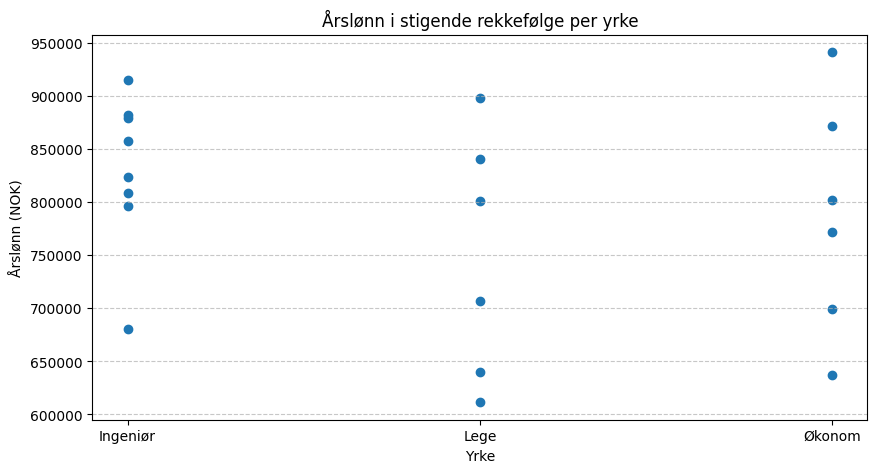

In [117]:
# Plotter lønn per yrke

plt.figure(figsize=(10, 5))
plt.scatter(df["Yrke"], df["Lønn"])
plt.title("Årslønn i stigende rekkefølge per yrke")
plt.xlabel("Yrke")
plt.ylabel("Årslønn (NOK)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Er det andre måter å plotte dette på en fornuftig måte?